   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 66.0 MB/s eta 0:00:00
AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

.obs columns: Index(['bulk_labels

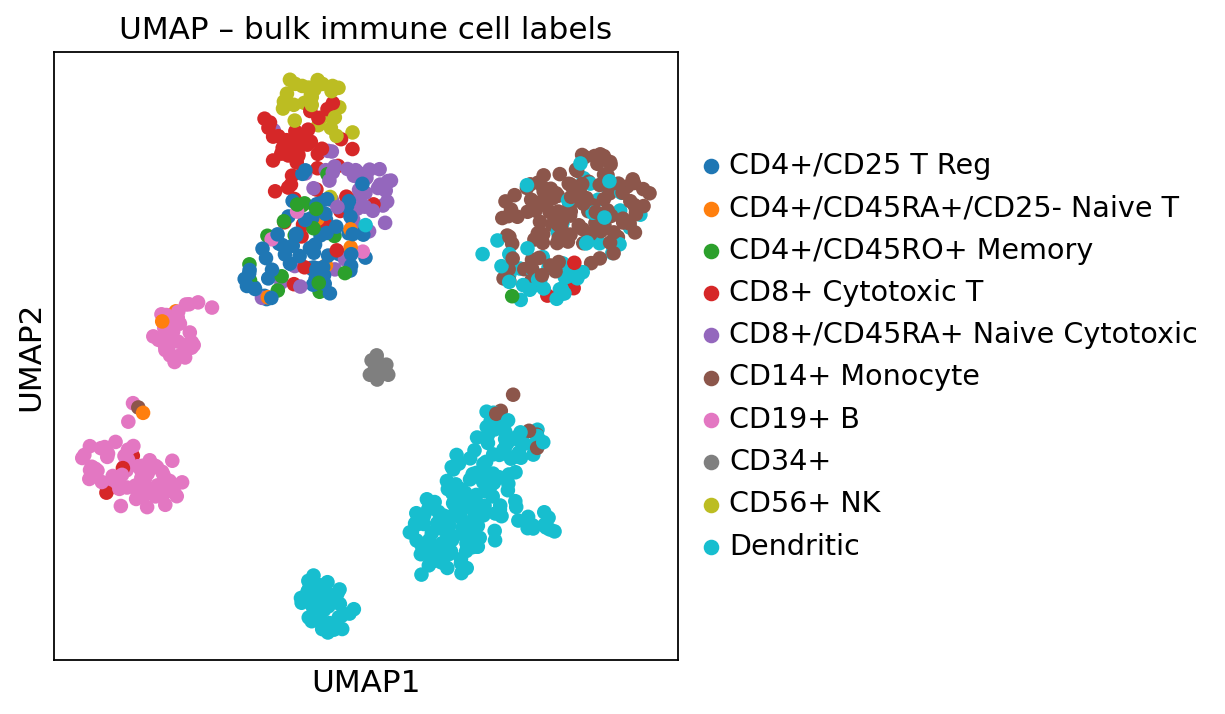

/tmp/ipython-input-4235764585.py:32: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


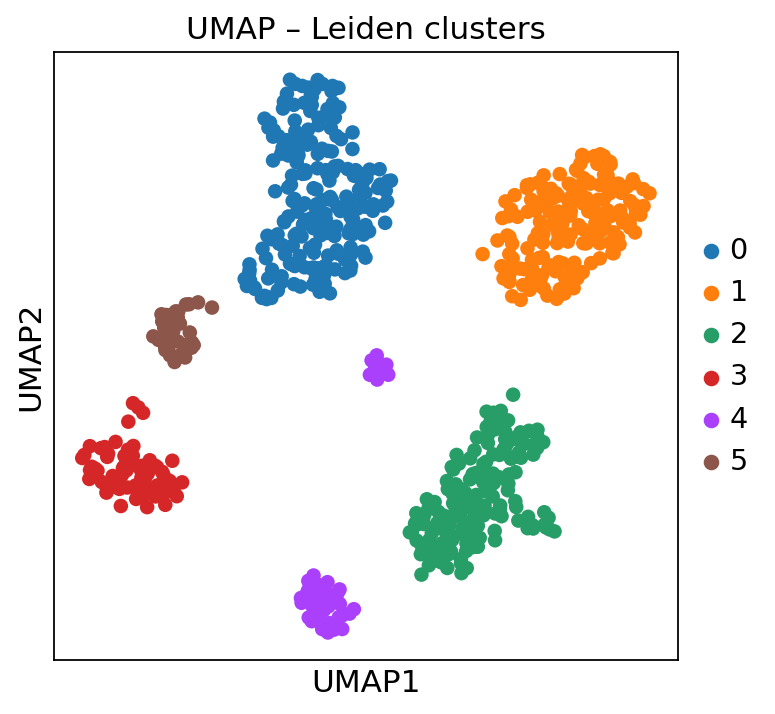


Immune cell-type proportions (bulk_labels):
bulk_labels
Dendritic                       0.342857
CD14+ Monocyte                  0.184286
CD19+ B                         0.135714
CD4+/CD25 T Reg                 0.097143
CD8+ Cytotoxic T                0.077143
CD8+/CD45RA+ Naive Cytotoxic    0.061429
CD56+ NK                        0.044286
CD4+/CD45RO+ Memory             0.027143
CD34+                           0.018571
CD4+/CD45RA+/CD25- Naive T      0.011429
Name: count, dtype: float64


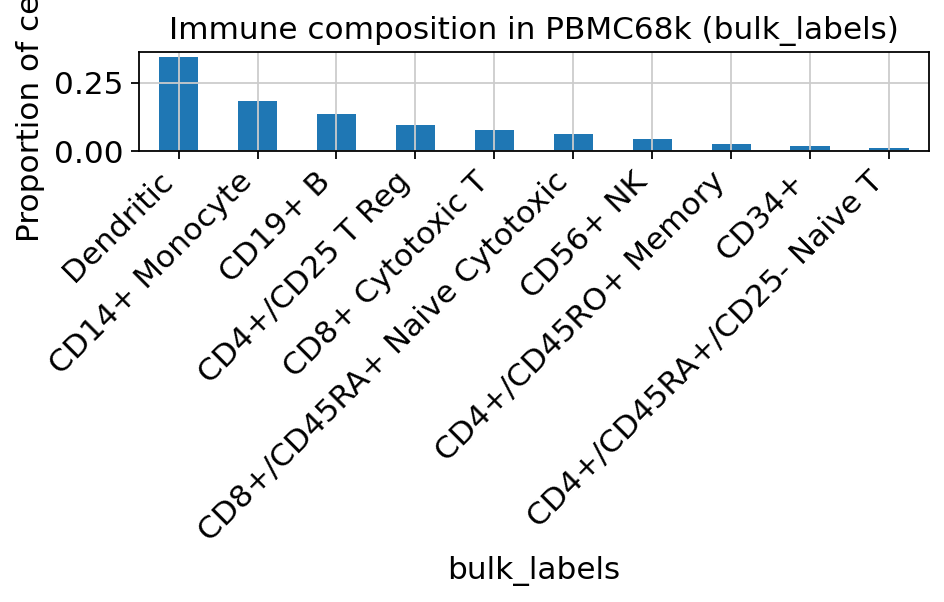


Cross-tab: bulk_labels x Leiden clusters
leiden                         0    1    2   3   4   5
bulk_labels                                           
CD4+/CD25 T Reg               68    0    0   0   0   0
CD4+/CD45RA+/CD25- Naive T     5    0    0   1   0   2
CD4+/CD45RO+ Memory           18    1    0   0   0   0
CD8+ Cytotoxic T              48    3    0   3   0   0
CD8+/CD45RA+ Naive Cytotoxic  43    0    0   0   0   0
CD14+ Monocyte                 0  122    6   1   0   0
CD19+ B                        3    0    0  62   0  30
CD34+                          0    0    0   0  13   0
CD56+ NK                      31    0    0   0   0   0
Dendritic                      1   52  152   0  35   0


In [1]:
# ============================================
# CITA Lab – Immune Atlas, Step 2 (Safe Version)
# Using built-in Scanpy pbmc68k_reduced dataset
# ============================================

# 0. Install dependencies
!pip install scanpy anndata scikit-learn python-igraph leidenalg --quiet

# 1. Imports
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sc.settings.set_figure_params(figsize=(5, 5))

# 2. Load built-in PBMC68k dataset
adata = sc.datasets.pbmc68k_reduced()
print(adata)

print("\n.obs columns:", adata.obs.columns)
print(adata.obs[['louvain', 'bulk_labels']].head())

# 3. PCA is already computed in this reduced dataset, but we can still run UMAP
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)

# Plot UMAP colored by known immune cell labels (bulk_labels)
sc.pl.umap(adata, color='bulk_labels', title="UMAP – bulk immune cell labels")

# 4. Also plot Leiden clusters to see unsupervised structure
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color='leiden', title="UMAP – Leiden clusters")

# 5. Build a simple "immune composition atlas" by cell type

# Count cells per bulk immune label
comp_counts = adata.obs['bulk_labels'].value_counts()
comp_props = comp_counts / comp_counts.sum()

print("\nImmune cell-type proportions (bulk_labels):")
print(comp_props)

# 6. Bar plot of immune composition
plt.figure(figsize=(6, 4))
comp_props.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Proportion of cells")
plt.title("Immune composition in PBMC68k (bulk_labels)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. (Optional) Also see how Leiden clusters map to cell types:
cross_tab = pd.crosstab(adata.obs['bulk_labels'], adata.obs['leiden'])
print("\nCross-tab: bulk_labels x Leiden clusters")
print(cross_tab)